# **Python for Data Analysis - Final Project**

Maxence Raveau - Gaëlle Rigaud

---
## 0. Introduction 

In this part, we install all the libraries that we need for the project and import the dataset. 

The data set is called "online_shoppers_intentions" and was donated in august 2018.  Thanks to the description of the dataset, we already know that it contains 12,330 rows, described by 18 variables, and that 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

###  0.1. Importation of libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 0.2. Importation of the dataset

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The dataset represents shopping intentions of customers on a web site. According to the source : "The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period."

We now clearly see the 12,330 entries of the dataset and their 18 describing variables. 10 of these variables are numerical and the other 8 variables are categorical. Our target variable is the "Revenue" variable. It's a boolean variable which indicates if there was a sale or not in a particular session. Besides, it's important to note that there is no missing value in the dataset. 

Now that we have casted a glance to our dataset, let's go further and visualize the importance of each variables in the explanation of the target.

---
## 1. Data Visualization 

The aim of this part is to apprehend the dataset and to visualize the link between the variables and the target, which is the "Revenue" variable. The "Revenue" column contains boolean values. If it is True, the consumer bought the product designated in the "ProductRelated" column. If it is False, it means that the consumer consulted the page of the product without buying it.


### 1.1. Number of sales 
Let's see how many sales have been made by month. For this, we need the list of months that exist in the dataset and the number of "True" values in the column "Revenue", grouped by month. Then, we will present these numbers in a bar plot. 

In [6]:
monthsList = df["Month"].value_counts().index.to_numpy() #List of distinct months in the "Month" column 
allSales = df.loc[ df["Revenue"] == True ] #All the rows with a "True" value in the "Revenue" column (ie. all the consultations that were concluded by a sale)
salesPerMonth = allSales.groupby("Month").count()["Revenue"] #Total of sales per month 
sortedMonths = ['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

Text(0, 0.5, 'Number of sales')

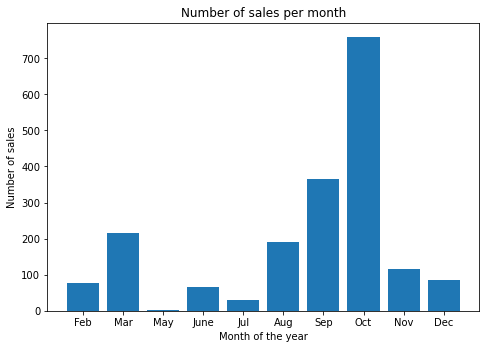

In [7]:
#Bar plot visualization of the number of sales per month 
figure = plt.figure() 
axes = figure.add_axes([0,0,1,1])
axes.bar( sortedMonths, salesPerMonth )
axes.set_title("Number of sales per month")
axes.set_xlabel("Month of the year")
axes.set_ylabel("Number of sales")

We also want to see the number of sales per region. 

In [8]:
regionsList = df["Region"].value_counts().index #List of distinct Region in the "Region" column 
salesPerRegion = allSales.groupby("Region").count()["Revenue"] #Total of sales per region 

([<matplotlib.axis.XTick at 0x1d943815040>,
 <a list of 9 Text major ticklabel objects>)

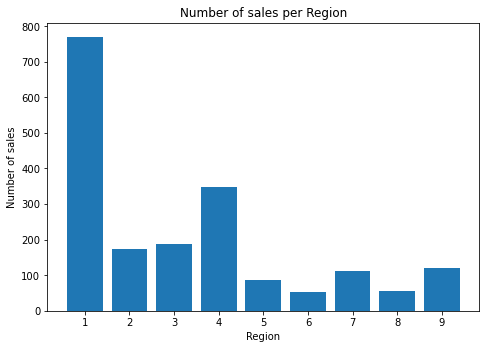

In [9]:
figure = plt.figure() 
axes = figure.add_axes([0,0,1,1])
axes.bar( regionsList, salesPerRegion )
axes.set_title("Number of sales per Region")
axes.set_xlabel("Region")
axes.set_ylabel("Number of sales")
plt.xticks(regionsList)

### 1.2. Never Purchased Products

Now that we have studied the sales, we would also like to know if there are products in the dataset that are never bought. And if they exist, we also would like to have the list of them. 

To do this, we get the list of all the product there have been consulted but not purchased at least. Indeed, it correspond to the rows with a value "False" in the "Revenue" column. Thus, we have divided the dataset into two sub-datasets : the "allSales" dataset that contains all the rows concluded by a sale and "noSale" dataset that contains all the rows that didn't lead to a sale.

In [10]:
noSale = df[df["Revenue"]==False] #All the rows with a "False" value in the "Revenue" column
len(allSales) + len(noSale) == len(df)

True

In order to see if there are products that are never bought, we also need to get the list of the purchased products and the list of all the products that exist in our dataset. 

Then, we verify that the list of purchased products is a subset of the list of all products. If it is True, it means that not all products of the dataset are bought, at least once. So, it exists products in the dataset that are never bought. 

In [11]:
purchasedProducts = allSales["ProductRelated"].value_counts().index.to_numpy() #Array containing all the products that were purchased (at least once)7
allProducts = df["ProductRelated"].value_counts().index.to_numpy() #Array containing all the products of the dataset 

set.issubset(set(purchasedProducts),set(allProducts)) #Test if some products are in the dataset but are never purchased | Result = True

True

Now we know that they exist, we want to get all these products that are never purchased. In order to have this, we create a function that go through the list containing all the products of the dataset. For each product, the function verify if the product is also in the list of the bought products. If not, the function add the product to the list of product that are never purchased. The function returns this list. 

In [12]:
def findNeverBoughtProducts(boughtProducts, allProd) :
  neverBoughtProducts = []
  for item in allProd :
    if not item in boughtProducts : 
      neverBoughtProducts.append(item)
  return neverBoughtProducts

neverBoughtProducts = np.array(findNeverBoughtProducts(purchasedProducts,allProducts))
neverBoughtProducts

array([103, 141, 128, 105, 151, 179, 121, 222, 143, 135, 187, 230, 227,
       181, 169, 280, 184, 168, 337, 180, 188, 204, 220, 231, 206, 190,
       256, 272, 312, 328, 262, 440, 584, 254, 246, 158, 374, 223, 391,
       351, 343, 311, 287, 279, 271, 255, 247, 207, 358, 191, 686, 518,
       486, 414, 192, 349, 429, 378, 423, 315, 291, 283, 275, 251, 211,
       362, 290, 282, 274, 266, 210, 705, 449, 205, 177, 340, 217, 241,
       281, 305, 313, 377, 385, 292, 409, 339], dtype=int64)

In [13]:
len(neverBoughtProducts)

86

Finally, we obtain a list of 86 products that are in the dataset but never purchased by any costumer. 

Just to be sure, we create second function to test if our list of never bought products is correct. The fonction go thought the list of the never purchased products and, for each product, it verify if the product is not in the "purchased products" list. The function returns True is none of the products in the "never bought" list appear in the "purchased" list. 

In [14]:
def TestNeverBoughtProducts(never, bought) : 
  correct = True 
  cursor = 0 
  while correct and cursor<len(never) : 
    if never[cursor] in bought : 
      correct = False
    cursor += 1
  return correct

TestNeverBoughtProducts(neverBoughtProducts,purchasedProducts)

True

### 1.3. Most Consulted and Most Purchased Products
Now we will focus on the products, their sales, their consultations, ... 

Let's etudiate the number of consultation for each product. 

In [15]:
numberOfConsultationByProduct = df["ProductRelated"].value_counts()#Table of all the products that exist in the dataset and the number of time they were consulted 
#differentProducts = df["ProductRelated"].value_counts().index #List of the different products that exist in the dataset.

In [16]:
# Top 10 of most consulted products 
top10 = numberOfConsultationByProduct.head(10) #First column = name of the product, second colum = number of cosultations 
top10

1     622
2     465
3     458
4     404
6     396
7     391
5     382
8     370
10    330
9     317
Name: ProductRelated, dtype: int64

In [17]:
# Top 10 of less consulted products 
numberOfConsultationByProduct.tail(10) #First column = name of the product, second colum = number of cosultations 

241    1
281    1
305    1
313    1
324    1
377    1
385    1
292    1
409    1
339    1
Name: ProductRelated, dtype: int64

Now we want the list of the most and less sold products. For this, we will use the "allSales" dataset creates before. 

In [18]:
numberOfSalesPerProduct = allSales["ProductRelated"].value_counts() #The number of sale per product

In [19]:
# Top 10 of the most sold products 
top10Sales = numberOfSalesPerProduct.head(10)
top10Sales

10    50
13    45
22    44
14    43
21    42
19    42
8     42
17    40
12    40
15    40
Name: ProductRelated, dtype: int64

In [20]:
# Top 10 of the less sold products 
numberOfSalesPerProduct.tail(10)

186    1
163    1
183    1
182    1
173    1
172    1
170    1
166    1
165    1
534    1
Name: ProductRelated, dtype: int64

The utility of this top 10 of the less purchased products can be discussed because we saw in the previous part that it also exist 86 products in the dataset that simply never bought by any costumer. 

Knowing that a lot of products are only consulted once, we want to know if theses products also belongs to the list of the "never bought" products.

In [66]:
nb = 0
for product in numberOfSalesPerProduct.index:
  if numberOfSalesPerProduct[product] == 1 :
    if numberOfSalesPerProduct[product] in neverBoughtProducts :
      nb += 1 
nb

0

The tops 10 of the less consulted and less sold products are not very interessant. In fact, a lot of products are only seen once and 86 products are never purchased. However, among the products that are only consulted once, none belongs to the list of products thar are never bought. It is to the marketing and selling teams study the eventuality to withdraw a product from sale or to change its presentation page. 

At the contrary, we can say a lot more about the tops 10 of most consulted and most sold products. In fact, we can see that only two products, the nummber 8 and the number 10, are in the two lists. This means that most of the most consulted products aren't the most sold. It brings light to the fact that maybe the presentation pages of the theses products are not attractive enough for consumers or that the publicity made on these products brought them visibility but without giving the consumers the desire to buy it. 

### 1.4. Pre-Purchase Behaviour

Let's dive further and see the relation between the time spent on a product page and the number of sales of this product. 

In [22]:
df[["ProductRelated_Duration","Revenue"]].groupby("Revenue").mean()

,ProductRelated_Duration
Revenue,
False,1069.987809
True,1876.209615


Consumers spend on average more time on the page of a product they are about to buy. This shows the correlation between the time spent on a product page and the number of sales of this product.

Now let's see if the number of pages consulted influence the Revenue variable.

In [23]:
df[["PageValues","Revenue"]].groupby("Revenue").mean()

,PageValues
Revenue,
False,1.975998
True,27.264518


Consumers browse on average more the website when they buy a products. This shows the correlation between the number of page visited by the customer and the probability for a consumer to buy a product from the website.

Now, let's see if new customers are more inclined to buy. 

In [24]:
allSales.groupby("VisitorType")["Revenue"].count()

VisitorType
New_Visitor           422
Other                  16
Returning_Visitor    1470
Name: Revenue, dtype: int64

In [25]:
noSale.groupby("VisitorType")["Revenue"].count()

VisitorType
New_Visitor          1272
Other                  69
Returning_Visitor    9081
Name: Revenue, dtype: int64

Most of people who buy are returning visitors, but it is also the case for people who don't buy. We'll need the correlation matrix to see the relation between the visitor type and the Revenue variable. 

### 1.5. Sesonal Behaviours 

In this part of the study, we will try to see if consumers' behaviors change on the weekend or around special days like Valentine's day or Thanksgiving. 

Text(0, 0.5, 'Number of sales')

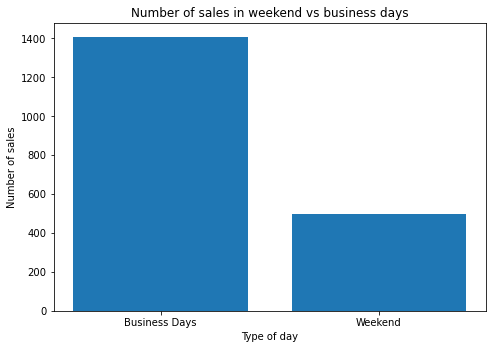

In [26]:
salesweekend = allSales.groupby("Weekend").count()["Revenue"] #Sales on weekend vs business days
figure = plt.figure() 
axes = figure.add_axes([0,0,1,1])
axes.bar( ["Business Days","Weekend"], salesweekend )
axes.set_title("Number of sales in weekend vs business days")
axes.set_xlabel("Type of day")
axes.set_ylabel("Number of sales")

There are way more sales in business days than in the weekend.

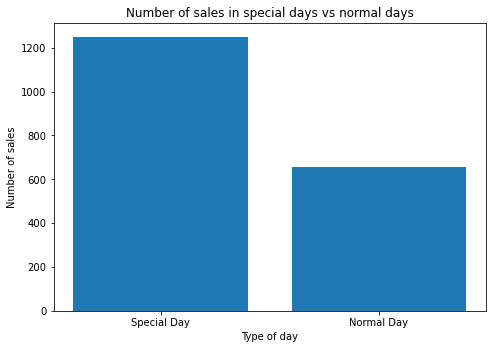

In [27]:
Sales_special_event = df.loc[ df["SpecialDay"] != 0 ] #All the rows with a with a value different of 0 in the "SpecialDay" column (ie. all sales around a special day)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
langs = ["Special Day", "Normal Day"]
number = [Sales_special_event.count()[0],allSales.count()[0]-Sales_special_event.count()[0]]
axes.bar(langs,number)
axes.set_title("Number of sales in special days vs normal days")
axes.set_xlabel("Type of day")
axes.set_ylabel("Number of sales")
plt.show()

There are way more sales around special days like mother's day or valentines Day than on normal days.

### 1.6. Correlation between all the variables

In order to visualize the correlation between all the variables, we build a correlation matrix. For more readability, we will present only a half of the correlation matrix (because of the symmetry of the matrix). 

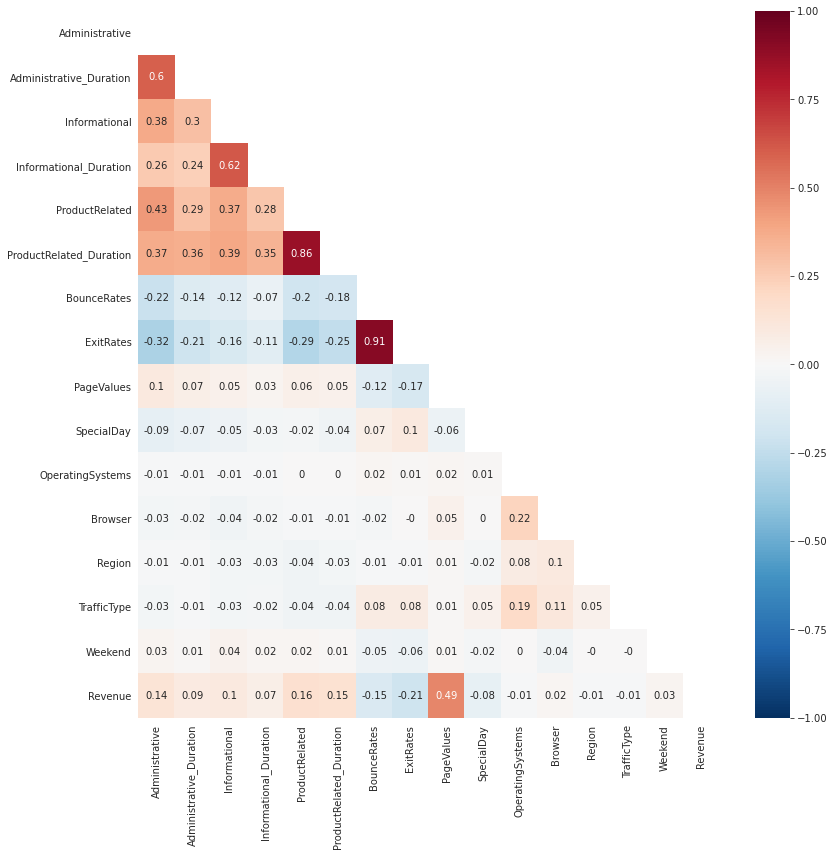

In [28]:
corr = df.corr().round(2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");

Thanks to this correlation matrix, we see that principal correlation links are : 
 - ExitRate and BounceRate -> 91% of correlation
 - ProductRelated_Duration and ProductRelated -> 86% of correlation
 - Informational_Duration and Informational -> 62% of correlation
 - Administrative_Duration and Administrative -> 60% of correlation
 - Revenue and PageValues -> 49% of correlation
It's important to note that these top correlations are positives. 


We also see variables that have almost no correlation: 
 - OperatingSystem with ProductRelated and ProductRelated_Duration
 - Browee with ExitRates and SpecialDay
 - Weekend with OperatingSystem, Region and TrafficType
This is an non-exhaustive list. Many other variables have very low correlation rates. 


This entire correlation matrix is very interesting but, as we have a target variable, let's now focus on it and see which variables explain its variability the most.

In [29]:
abs(corr["Revenue"]).sort_values(ascending=False)[1:]

PageValues                 0.49
ExitRates                  0.21
ProductRelated             0.16
BounceRates                0.15
ProductRelated_Duration    0.15
Administrative             0.14
Informational              0.10
Administrative_Duration    0.09
SpecialDay                 0.08
Informational_Duration     0.07
Weekend                    0.03
Browser                    0.02
TrafficType                0.01
Region                     0.01
OperatingSystems           0.01
Name: Revenue, dtype: float64

We chose to sort the absolute values of the correlations so that we see the most important variables, no matter if the correlation is positive or negative. 

Thus, we see that almost 50% of Revenue is explained by PagesValues. Besides, this correlation is positive so we can say that when the value of PagesValues increase, the probability of a sale increase too. 

The other variables that are the most correlated to Revenue are ExitRates, ProductRelated and BounceRates. At contrary, OperatingSystem, Region and TrafficType are the least correlated variables with Revenue. We could suppress these variables the dataset as the do not explain much the target variable. 

## 2. Supervised Learning

In this part, thanks to machine learning, we will try to produce effective prediction models to know if a certain session will be concluded by a sale or not. 

Because our target variable is qualitative, we will use classification models like logistic regression, discriminant analysis, regression trees, ...

### 2.1. Prepare the dataset
In order to train our models we need to split the inital dataset into two parts : a training set and a testing set. 

But first of all, because our dataset contain qualitative data, we need to transform this into quantitative data. We will represent the months by their number. For boolean values, we'll consider that True correspond to 0 and False to 1. Finally, here are the correspondances for the VisitorType Variable : 
 - 0 : Returning_Visitor
 - 1 : New_Visitor
 - 2 : Other

In [30]:
df["Month"].replace(["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],[2,3,5,6,7,8,9,10,11,12],inplace = True)
df["VisitorType"].replace(["Returning_Visitor","New_Visitor","Other"],[0,1,2],inplace=True)
df["Weekend"].replace([True,False],[0,1],inplace=True)
df["Revenue"].replace([True,False],[0,1],inplace=True)

We will also drop some of the variables that are the least correlated to our target, as seen previously. 

In [31]:
df = df.drop("OperatingSystems", axis = 1)
df = df.drop("Browser", axis = 1)
df = df.drop("TrafficType", axis = 1)

After that, we can split our dataset into two subsets which will respectively represent the variables and the target of our models.

In [32]:
target = df["Revenue"]
variables = df.drop("Revenue", axis=1)
variables.shape, target.shape

((12330, 14), (12330,))

Then, we split theses dataframe in two to have a train and a test set. We put 40% of the data into the test set and the other 60% into the train set.

In [33]:
from sklearn.model_selection import train_test_split

var_train, var_test, tar_train, tar_test = train_test_split(variables, target, test_size=0.4, random_state=22)

Moreover, we need to standardize the data to be sure that dimensions related problems won't occur. Because we splited our dataset into a train and a test set randomly and in order to not lose the indexes of our two sets, we save them before the standardization. 

In [34]:
trainIndexes = var_train.index
testIndexes = var_test.index

trainColumns = var_train.columns
testColumns = var_test.columns

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(var_train) # We only fit on the trainning data 
var_train = pd.DataFrame(scaler.transform(var_train))
var_test = pd.DataFrame(scaler.transform(var_test))

var_train.index = trainIndexes
var_test.index = testIndexes
var_train.columns = trainColumns
var_test.columns = testColumns

Now, our dataset is ready to be exploited in our models.

### 2.2. Principal Components Analysis 
The principal components analysis isn't a machine learning model. It is a method of dimensional reduction. We make a pca before creating models because we hope this will permit us to work with less variables and so reduce computation time. 

To begin, we apply the pca on our training set and we focus on the 2 first principal components. 

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(var_train)

df_pca2 = pd.DataFrame(data = principalComponents, columns = ["PC1","PC2"])
df_pca2.index = trainIndexes
df_pca2 = pd.concat([df_pca2, tar_train], axis = 1)
df_pca2

,PC1,PC2,Revenue
6869,3.651038,0.862200,1
639,-0.664892,-0.604622,1
1,-1.633625,0.346429,1
4883,-3.382472,3.493156,1
2363,-3.560440,3.733096,1
...,...,...,...
6646,0.219825,-0.754142,0
5478,-0.958252,0.406435,1
8548,8.889897,4.125506,0
6276,0.285453,-3.144463,0


Now that we have our two first principal componants, let's vizualise our data in 2 dimensions.

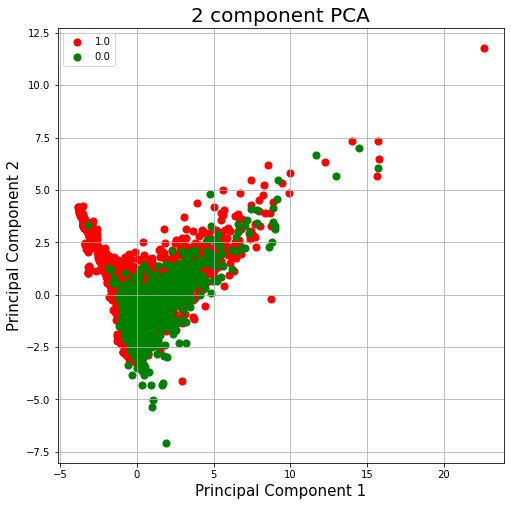

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = [1.0,0.0]
colors = ["r","g"]
for target, color in zip(targets,colors):
    indicesToKeep = df_pca2['Revenue'] == target
    ax.scatter(df_pca2.loc[indicesToKeep, 'PC1']
               , df_pca2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

This vizualisation doesn't seem very relevant. To verify the relevance of the these two principal components, we compute their explained variance ratio. 

In [38]:
pca.explained_variance_ratio_

array([0.24502329, 0.12639274])

With these explained variance ratios, we see that our two first principal components only explain 36% of the variance. This percentage is quite low. But our aim is not to specially to visualize our data in a 2D plot, so we can add other principal components to increase the cumulative explained variance ratio. 

Instead of repeating this process again and again, we create a function that gives us the number of principal components we need in order to obtain a cumulative explained variance ratio greater than a given percentage. 

In [39]:
def numberOfPC(percentage) :
#Return the number of PC needed to reach a certain percentage of cumulative explained ratio.
    explainedVar = 0
    nbOfPC = 1
    while(explainedVar < percentage):
        nbOfPC += 1
        pca = PCA(n_components = nbOfPC)
        pca.fit_transform(var_train)
        explainedVar = np.cumsum(pca.explained_variance_ratio_)[nbOfPC-1]
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()
    return(nbOfPC, explainedVar)

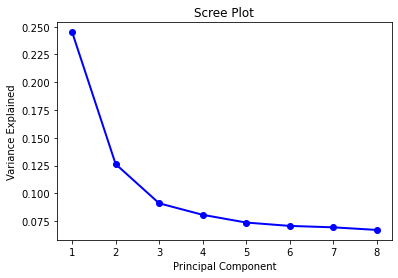

(8, 0.8246496199777208)

In [40]:
numberOfPC(0.8)

Thus, in order to represent at least 75% of the variance of the dataset we need 7 principal components. This represents the half of the number of variables we have in our data set. 

We can conclude that the principal components analysis was not very concluant on our data. We decide to not use this representation of our data in the following models. 

### 2.3.  Function to find the best parameters for a model 

In order to find the better model, we'll test different machine learning model on our dataset. And even in each of these models, we know that different parameters can be chosen. So, to find the better parameters for each models, we use the GridSearchCV function from the sklearn library. We automize this process by creating a function that takes in entry the model we want to test and the possible parameters of this model. This function will return the best score obtained with this model and the parameters used in the model to obtain this score.

In [41]:
from sklearn.model_selection import GridSearchCV

def findBestParameters(model,parameters):
    grid = GridSearchCV(model, parameters, n_jobs = -1)
    grid.fit(var_train, tar_train)
    return grid.best_score_, grid.best_estimator_

Now that we created the function, let's test it on a model. We chose the TweedieRegressor model and we test with some parameters. 

In [42]:
from sklearn.linear_model import TweedieRegressor
parameters = { "power": [1, 2, 3],
             "alpha": [0.1, 0.5, 0.7],
             "link": ["log"]}
algo = TweedieRegressor()
findBestParameters( algo, parameters )

(0.22417184614411462, TweedieRegressor(alpha=0.1, link='log', power=1))

The function returned a score and a list of parameters. But the obtained score is low. Let's try again with other parameters.

In [43]:
parameters = { "power": [0, 1, (1,2), 2, 3],
             "alpha": [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.5, 1, 1.5, 2, 5, 10, 20, 50],
              "fit_intercept" : [True, False], 
             "link": ["auto", "log"]}
findBestParameters( algo, parameters )

(0.3866237644112326, TweedieRegressor(alpha=0.0005, link='log', power=0))

We tested this model with the all the parameters we could and the best score is still quite low. This model isn't adapted to our dataset. Let's try other models. 

### 2.4. Test different models 

In this part, we will test different classification models. We will save the best score of each model into a table and exploit it in the following section. 

In [44]:
modelsScores = []

##### 2.4.1. Logistic Regression

Let's try the logistic regression model. For this, we import the LogisticRegression function from sklearn library and we apply the function we created earlier. We first try with not many parameters. 

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
algo = LogisticRegression()
parameters = {"solver" : ["lbfgs"]}
findBestParameters(algo, parameters)

(0.8822661403797307, LogisticRegression())

With only one random parameter, the model already seem very good with a score of 88.22% of good predictions. Let's improve this score by testing this model with other parameters. 

In [47]:
parameters = { "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
              "dual" : [True, False],
              "C" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              "fit_intercept" : [True, False], 
              "intercept_scaling" : [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1, 1.5, 3, 5, 10, 20],
              "solver" : ['newton-cg', 'lbfgs', 'sag', 'saga'],
              "multi_class" : ['auto', 'ov', 'multinomial']}
score = findBestParameters(algo, parameters)
modelsScores = modelsScores + ["Logistic Regression", score[0]]
score

(0.8852414889534564,
 LogisticRegression(C=0.1, fit_intercept=False, intercept_scaling=0.01,
                    penalty='l1', solver='saga'))

With the best parameters, the score inscreased by 0.3%. So we can conclude that the best score we can have on this model is 88.52% of good predictions.  

##### 2.4.2. Linear Discriminant Analysis

Let's try the linear discriminant analysis model. For this, we import the LinearDiscriminantAnalysis function from sklearn library and we apply the function we created earlier. We first try with not many parameters. 

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
algo = LinearDiscriminantAnalysis()
parameters = {"solver" : ['svd', 'lsqr', 'eig']}
findBestParameters(algo, parameters)

(0.8787518959121392, LinearDiscriminantAnalysis())

With only one random parameter, the model already seem very good with a score of 87.87% of good predictions. Let's improve this score by testing this model with other parameters. 

In [50]:
parameters = {
    "solver" : ['svd', 'lsqr', 'eig'],
    "shrinkage" : [None, 'auto'],
    "n_components" : [1, 2, 3, 5, 10, 20],
    "store_covariance" : [True, False]}
score = findBestParameters(algo, parameters)
modelsScores = modelsScores + ["Linear Discriminant Analysis", score[0]]
score

(0.8787518959121392,
 LinearDiscriminantAnalysis(n_components=1, store_covariance=True))

Even with the best parameters, the best score didn't change. So we can conclude that the best score we can have on this model is 87.87% of good predictions.  

##### 2.4.3. Quadratic Discriminant Analysis

Let's try the quadratic discriminant analysis model. For this, we import the QuadraticDiscriminantAnalysis function from sklearn library and we apply the function we created earlier. We first try with not many parameters.

In [51]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [52]:
algo = QuadraticDiscriminantAnalysis()
parameters = {"store_covariance" : [False,True]}
findBestParameters(algo, parameters)

(0.8315748405606417, QuadraticDiscriminantAnalysis())

With only one random parameter, the model already seem very good with a score of 83.15% of good predictions. Let's improve this score by testing this model with other parameters. 

In [53]:
parameters = {
    "store_covariance" : [False,True],
    "reg_param" : [0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75, 1, 2, 5, 10, 25]
}
score = findBestParameters(algo, parameters)
modelsScores = modelsScores + ["Quadratic Discriminant Analysis", score[0]]
score

(0.8545551230743929, QuadraticDiscriminantAnalysis(reg_param=1))

With the best parameters, the score inscreased by 2%. So we can conclude that the best score we can have on this model is 85.45% of good predictions.  

##### 2.4.4. Decision Tree Classifier

Let's try the decision tree model. For this, we import the DecisionTreeClassifier function from sklearn library and we apply the function we created earlier. We first try with not many parameters.

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
algo = DecisionTreeClassifier()
parameters = {"criterion" : ['gini','entropy']}
findBestParameters(algo, parameters)

(0.8590148566416316, DecisionTreeClassifier(criterion='entropy'))

With only one random parameter, the model already seem very good with a score of 85.96% of good predictions. Let's improve this score by testing this model with other parameters. 

In [56]:
parameters = {
    "criterion" : ['gini','entropy'],
    "splitter" : ['best', 'random'],
    "max_features" : ['auto', 'sqrt', 'log2'],
    "ccp_alpha" : [0, 0.01, 0.1, 0.5, 1, 2.5, 5, 10]}
score = findBestParameters(algo, parameters)
modelsScores = modelsScores + ["Decision Tree Classifier", score[0]]
score

(0.8680723827275552,
 DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='auto'))

With the best parameters, the score inscreased by 1.6%. So we can conclude that the best score we can have on this model is 87.61% of good predictions.  

Let's plot the tree representing this model. 

[Text(167.4, 190.26, 'X[0] <= -0.547\nentropy = 0.614\nsamples = 7398\nvalue = [1122, 6276]'),
 Text(83.7, 135.9, 'X[4] <= -0.597\nentropy = 0.411\nsamples = 3462\nvalue = [286, 3176]'),
 Text(41.85, 81.53999999999999, 'entropy = 0.112\nsamples = 1135\nvalue = [17, 1118]'),
 Text(125.55000000000001, 81.53999999999999, 'entropy = 0.517\nsamples = 2327\nvalue = [269, 2058]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 3.258\nentropy = 0.746\nsamples = 3936\nvalue = [836, 3100]'),
 Text(209.25, 81.53999999999999, 'X[8] <= -0.317\nentropy = 0.752\nsamples = 3844\nvalue = [829, 3015]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.321\nsamples = 2532\nvalue = [148, 2384]'),
 Text(251.10000000000002, 27.180000000000007, 'entropy = 0.999\nsamples = 1312\nvalue = [681, 631]'),
 Text(292.95, 81.53999999999999, 'entropy = 0.388\nsamples = 92\nvalue = [7, 85]')]

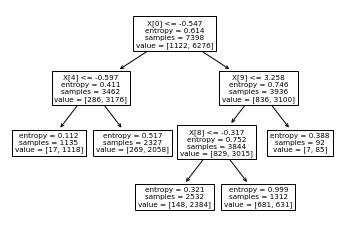

In [57]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='sqrt')
clf.fit(var_train,tar_train)
clf.predict(var_test)
plot_tree(clf)

##### 2.4.5. K-Neighbors Clasifier

Let's try the K-Neighbors classifier model. For this, we import the KNeighborsClassifier function from sklearn library and we apply the function we created earlier. We first try with not many parameters.

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
algo = KNeighborsClassifier()
parameters = {"n_neighbors" : [5,10,15,20,50]}
findBestParameters(algo, parameters)

(0.8824010927763464, KNeighborsClassifier(n_neighbors=20))

With only one random parameter, the model already seem very good with a score of 88.24% of good predictions. 

We want to improve this score by testing this model with other parameters. But before that, let's find the best number of neighbors. To do so, we create a function that test all the number of neighbors from 1 to 100. The function returns the best number of neighbors according to the "good predictions" score. 

In [60]:
def betterNumberOfNeighbors( ):
    max = 0 
    neigh_max = 0
    scores = []
    for i in range(1, 100): 
        neigh = KNeighborsClassifier( n_neighbors = i )
        neigh.fit(var_train, tar_train)
        score = neigh.score(var_test,tar_test)
        scores.append(score)
        if(score > max):
            max = score
            neigh_max = i
    plt.plot(range(1,100),scores)
    return neigh_max, score

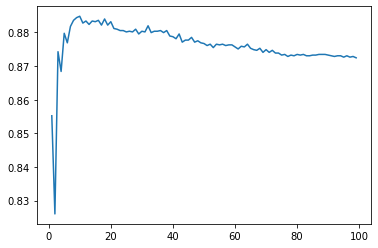

In [61]:
nbNeighbors = betterNumberOfNeighbors()

So, here we know that we will have 11 neighbors in our model.

Now, let's try wih other parameters. 

In [62]:
parameters = {
    "n_neighbors" : [nbNeighbors[0]],
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p" : [1,2,3,4,5],
    "leaf_size" : [5,10,20,50]
}
score = findBestParameters(algo, parameters)
modelsScores = modelsScores + ["KNeighbors Classifier", score[0]]
score

(0.8834824479652067,
 KNeighborsClassifier(leaf_size=5, n_neighbors=10, p=5, weights='distance'))

With the best parameters, the score inscreased by 0.1%. So we can conclude that the best score we can have on this model is 88.34% of good predictions.  

### 2.5. Conclusion 

Finally, we tested 5 machine learning models. Let's vizualise the score of each model and find the best model.

In [63]:
models = []
scores = []
    
def findBestModel(modSco):
    maxi = 0 
    bestModel = ""
    for i in range(0,len(modelsScores), 2): 
        models.append(modelsScores[i])
        scores.append(modelsScores[i+1])
        if(modelsScores[i+1]>maxi):
            maxi = modelsScores[i+1]
            bestModel = modelsScores[i]
        print(modelsScores[i] , modelsScores[i+1])
    return (bestModel, maxi)

In [64]:
findBestModel(modelsScores)

Logistic Regression 0.8852414889534564
Linear Discriminant Analysis 0.8787518959121392
Quadratic Discriminant Analysis 0.8545551230743929
Decision Tree Classifier 0.8680723827275552
KNeighbors Classifier 0.8834824479652067


('Logistic Regression', 0.8852414889534564)

Thus, we can see that all the scores are between 85% and 89%. These scores are all quite good, wich means that all the models could be used to predict data from our dataset. But the best model still is the logistic regression with almost 89% of good predictions, as we can see on the plot below. 

Text(0, 0.5, 'best scores')

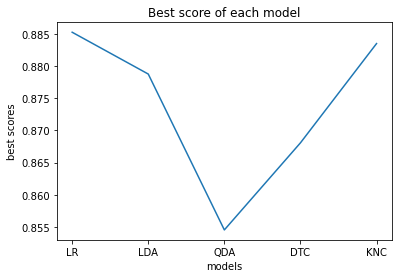

In [65]:
plt.plot(['LR','LDA',"QDA",'DTC',"KNC"], scores)
plt.title('Best score of each model')
plt.xlabel('models')
plt.ylabel('best scores')

_____________________________________________________________________________________________________________